In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
import os
import shutil
import glob

In [4]:
from __future__ import print_function, division
import cv2 as cv2
import os
import torch
import torchvision
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, List, Type, Dict, Any
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils, datasets
import torchvision.models as models
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import time
from tqdm import tqdm
import os.path
import os
from threading import Thread
from queue import Empty, Queue
import threading
from sklearn.utils import shuffle
import random


In [5]:
torch.manual_seed(378) # обнулили генератор рандома у торча
np.random.seed(378)# обнулили генератор рандома у нампая
torch.backends.cudnn.deterministic = True # ждем одинаковый результат у GPU и CPU Для одинаковых данны переданных торчу
torch.backends.cudnn.benchmark = False # вроде аналогично строчке выше


In [6]:
torch.cuda.device_count()
device1 = torch . device ( "cuda:0" if torch . cuda . is_available () else "cpu" )
print(device1)
device2 = torch.device('cpu')

cuda:0


In [42]:
df = pd.DataFrame({
        'Path': [],
        'Class': [],
        'Length':[]
})
df["Path"] = df["Path"].astype("string")
df["Class"] = df["Class"].astype("int")
df["Length"] = df["Length"].astype("int")


In [34]:
df

,Path,Class,Length


In [35]:
basic_train_clean_PATH = r"C:\Users\boris\Documents\notebok\госзнак\train\train\clean"
basic_train_noisy_PATH = r"C:\Users\boris\Documents\notebok\госзнак\train\train\noisy"

In [36]:
for dirs,folder,files in os.walk(basic_train_clean_PATH):
    #print('Выбранный каталог: ', dirs)
    if files!= [] and folder== []:
        #print('Вложенные папки: ', folder)
        #print('Файлы в папке: ', files)
        for file in files:    
            #print('Полный путь к файлу: ', os.path.join(basic_tain_clean_PATH, dirs,file))     
            df.loc[len(df.index)] = [os.path.join(basic_train_clean_PATH, dirs,file), 0,np.load(os.path.join(basic_train_clean_PATH, dirs,file)).shape[0]]

In [37]:
for dirs,folder,files in os.walk(basic_train_noisy_PATH):
    if files!= [] and folder== []:
        for file in files:    
            df.loc[len(df.index)] = [os.path.join(basic_train_noisy_PATH, dirs,file), 1,np.load(os.path.join(basic_train_noisy_PATH, dirs,file)).shape[0]]

In [38]:
df.to_csv(r"C:\Users\boris\Documents\notebok\госзнак\train_dataset.csv")

In [39]:
df.head()

,Path,Class,Length
0,C:\Users\boris\Documents\notebok\госзнак\train...,0,966
1,C:\Users\boris\Documents\notebok\госзнак\train...,0,658
2,C:\Users\boris\Documents\notebok\госзнак\train...,0,414
3,C:\Users\boris\Documents\notebok\госзнак\train...,0,974
4,C:\Users\boris\Documents\notebok\госзнак\train...,0,872


In [40]:
maximum = df['Length'].max()
maximum

1374

In [43]:
df = pd.DataFrame({
        'Path': [],
        'Class': [],
        'Length':[]
})
df["Path"] = df["Path"].astype("string")
df["Class"] = df["Class"].astype("int")
df["Length"] = df["Length"].astype("int")


In [44]:
basic_val_clean_PATH = r"C:\Users\boris\Documents\notebok\госзнак\val\val\clean"
basic_val_noisy_PATH = r"C:\Users\boris\Documents\notebok\госзнак\val\val\noisy"

In [45]:
for dirs,folder,files in os.walk(basic_val_clean_PATH):
    #print('Выбранный каталог: ', dirs)
    if files!= [] and folder== []:
        #print('Вложенные папки: ', folder)
        #print('Файлы в папке: ', files)
        for file in files:    
            #print('Полный путь к файлу: ', os.path.join(basic_tain_clean_PATH, dirs,file))     
            df.loc[len(df.index)] = [os.path.join(basic_train_clean_PATH, dirs,file), 0,np.load(os.path.join(basic_train_clean_PATH, dirs,file)).shape[0]]

In [46]:
for dirs,folder,files in os.walk(basic_val_noisy_PATH):
    if files!= [] and folder== []:
        for file in files:    
            df.loc[len(df.index)] = [os.path.join(basic_train_noisy_PATH, dirs,file), 1,np.load(os.path.join(basic_train_noisy_PATH, dirs,file)).shape[0]]

In [47]:
df.to_csv(r"C:\Users\boris\Documents\notebok\госзнак\val_dataset.csv")

In [48]:
df.head()

,Path,Class,Length
0,C:\Users\boris\Documents\notebok\госзнак\val\v...,0,685
1,C:\Users\boris\Documents\notebok\госзнак\val\v...,0,842
2,C:\Users\boris\Documents\notebok\госзнак\val\v...,0,983
3,C:\Users\boris\Documents\notebok\госзнак\val\v...,0,923
4,C:\Users\boris\Documents\notebok\госзнак\val\v...,0,513


In [49]:
maximum = df['Length'].max()
maximum

1226

In [53]:
df['Path'].loc[0]

'C:\\Users\\boris\\Documents\\notebok\\госзнак\\val\\val\\clean\\1084\\1084_139230_1084-139230-0002.npy'

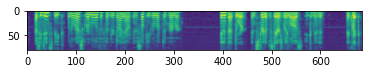

In [54]:
plt.imshow(np.load(df['Path'].loc[0]).astype(float).T)